In [55]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import pandas
from io import StringIO
import networkx as nx
import sympy
import scipy
from sklearn.preprocessing import normalize
from pathlib import Path

In [35]:
TP = "../src/tp"
TEST_DIR = "../tests/"

def run_test(test_name: str, niter: int, eps: float): 
    !{TP} {TEST_DIR + test_name} {niter} {eps}

# def absolute_error(test_result: str, expected_result: str):
#     test_table = read_result(test_result)
#     expected_table = read_result(expected_result)
#     return abs(test_table - expected_table)

def read_result_autovalores(test_result: str):
    return pandas.read_csv(TEST_DIR + test_result + '_autovalores.out', names=["autovalores"])

def read_result_autovectores(test_result: str):
    return pandas.read_csv(TEST_DIR + test_result + '_autovectores.out' , names=["autovectores"])

# 1. TESTS METODO

In [221]:
# TEST 1: MATRIZ DE HOUSEHOLDER Y MATRIZ DIAGONAL
n = 10
D = np.diag(range(n, 0, -1))

v = np.ones((D.shape[0], 1))
v = v / np.linalg.norm(v)

# Matriz de Householder
B = np.eye(D.shape[0]) - 2 * (v @ v.T)

M = B.T @ D @ B

# GUARDO TXT
#np.savetxt("../tests/householder.txt", M, delimiter=' ')

# CORRO METODO
run_test("householder.txt", 100000, 1e-20)

# CARGO AUTOVALORES Y AUTOVECTORES
l = np.loadtxt("../tests/householder.txt_autovalores.out", dtype='f', delimiter=' ')
v = np.loadtxt("../tests/householder.txt_autovectores.out", dtype='f', delimiter=' ', usecols=range(10))

print(M @ v[:, 0])
print(l[0] * v[:,0])

for i in range(len(M)):
    print(i)
    print(np.allclose(M @ v[:, i], l[i] * v[:,i], 1e-7))

Corriendo el programa...
[-8.00000012  2.00000003  2.00000003  2.00000003  2.00000003  2.00000003
  2.00000003  2.00000003  2.00000003  2.00000003]
[-8.  2.  2.  2.  2.  2.  2.  2.  2.  2.]
0
True
1
True
2
True
3
True
4
True
5
True
6
True
7
True
8
True
9
True


In [231]:
# CASO SIMETRICO
A = np.array([
  [ 7,  2,  -3],
  [ 2,  2,  -2],
  [-3, -2,  -2]
])

# GUARDO TXT
np.savetxt("../tests/simetrico.txt", A, delimiter=' ')

# CORRO METODO
run_test("simetrico.txt", 100000, 1e-20)

# CARGO AUTOVALORES Y AUTOVECTORES
l = np.loadtxt("../tests/simetrico.txt_autovalores.out", dtype='f', delimiter=' ')
v = np.loadtxt("../tests/simetrico.txt_autovectores.out", dtype='f', delimiter=' ', usecols=range(3))

print(A @ v[:, 0])
print(l[0] * v[:,0])

for i in range(len(A)):
    print(i)
    print(np.allclose(A @ v[:, i], l[i] * v[:,i], 1e-6))

Corriendo el programa...
[ 7.81802505  3.08596897 -2.73344308]
[ 7.818025  3.085969 -2.733443]
0
True
1
True
2
True


In [239]:
# CASO (A) * (A traspuesta)
AT = A @ A.T
TA = A.T @ A

# GUARDO TXT
np.savetxt("../tests/AT.txt", AT, delimiter=' ')
np.savetxt("../tests/TA.txt", TA, delimiter=' ')

# CORRO METODO
run_test("AT.txt", 100000, 1e-20)
run_test("TA.txt", 100000, 1e-20)

# CARGO AUTOVALORES Y AUTOVECTORES
l_AT = np.loadtxt("../tests/AT.txt_autovalores.out", dtype='f', delimiter=' ')
v_AT = np.loadtxt("../tests/AT.txt_autovectores.out", dtype='f', delimiter=' ', usecols=range(3))

l_TA = np.loadtxt("../tests/TA.txt_autovalores.out", dtype='f', delimiter=' ')
v_TA = np.loadtxt("../tests/TA.txt_autovectores.out", dtype='f', delimiter=' ', usecols=range(3))

print(l_AT)
print(l_TA)
print("Bingo :)" if np.allclose(l_AT,l_TA) else "Bongo :(")
print("Bingo :)" if np.allclose(v_AT,v_TA) else "Bongo :(")

Corriendo el programa...
Corriendo el programa...
[78.11643   10.79091    2.0926573]
[78.11643   10.79091    2.0926573]
Bingo :)
Bingo :)


## 2. KARATE CLUB

In [36]:
# CORRER TESTS PARA GENERAR ARCHIVOS DE AUTOVALORES Y AUTOVECTORES

#run_test("karateclub_matriz.txt", 10000, 0.000001)
#run_test("prueba.txt", 10000, 0.000001)
#run_test("laplaciana_karate.txt", 1000000, 1e-20)

In [240]:
eigenvalues_karate = read_result_autovalores("karateclub_matriz.txt")
eigenvectors_karate = read_result_autovectores("karateclub_matriz.txt")
eigenvalues_prueba = read_result_autovalores("prueba.txt")
eigenvectors_prueba = read_result_autovectores("prueba.txt")

# AUTOVAL Y AUTOVEC DE A (NUESTRA FUNCION)
aval_a = np.loadtxt("../tests/karateclub_matriz.txt_autovalores.out", dtype='f', delimiter=' ')
avec_a = np.loadtxt("../tests/karateclub_matriz.txt_autovectores.out", dtype='f', delimiter=' ', usecols=range(34))

# AUTOVAL Y AUTOVEC DE LAPLACIANA (NUESTRA FUNCION)
aval_l = np.loadtxt("../tests/laplaciana_karate.txt_autovalores.out", dtype='f', delimiter=' ')
avec_l = np.loadtxt("../tests/laplaciana_karate.txt_autovectores.out", dtype='f', delimiter=' ', usecols=range(34))

# VECTOR DE GRUPOS
grupos_vec = np.loadtxt("../tests/karateclub_labels.txt", dtype='f', delimiter=' ')

# MATRIZ DE ADYACENCIA
A = np.loadtxt(TEST_DIR + "karateclub_matriz.txt", dtype='i', delimiter=' ')

In [242]:
# EIGEN DE A (NUMPY)
np_aval_a, np_avec_a = np.linalg.eig(A)
A_nx = nx.from_numpy_array(A)

# LAPLACIANA
L_scipy = nx.laplacian_matrix(A_nx)
L = scipy.sparse.csr_matrix.toarray(L_scipy)

# EIGEN DE L (NUMPY)
np_aval_l, np_avec_l = np.linalg.eig(L)

# CONECTIVIDAD ALGEBRAICA
conectividad = np_avec_l[9]

[0.35548349 0.26595387 0.31718939 0.21117408 0.07596646 0.07948058
 0.07948058 0.17095511 0.22740509 0.10267519 0.07596646 0.05285417
 0.08425192 0.2264697  0.10140628 0.10140628 0.02363479 0.09239676
 0.10140628 0.14791134 0.10140628 0.09239676 0.10140628 0.15012329
 0.05705374 0.0592082  0.07558192 0.13347933 0.13107926 0.13496529
 0.17476028 0.19103627 0.30865105 0.37337121]
[0.35544863 0.26597068 0.31721324 0.21124779 0.07602111 0.07954041
 0.07954041 0.17105162 0.22748372 0.10271382 0.07602111 0.05290423
 0.08431341 0.22659571 0.10144557 0.10144557 0.02363945 0.09247271
 0.10144557 0.1480168  0.10144557 0.09247271 0.10144557 0.15012823
 0.05701144 0.05915577 0.07558873 0.13349618 0.13108724 0.13496539
 0.17480193 0.19112289 0.30844763 0.3730562 ]


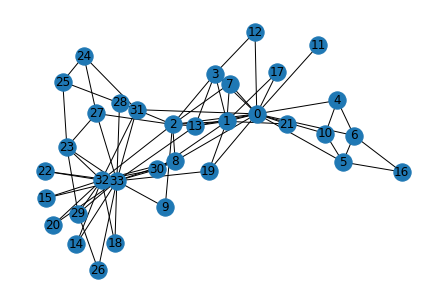

In [246]:
# CENTRALIDAD
centrality = nx.eigenvector_centrality(A_nx)

cen_vec = np.fromiter(centrality.values(), dtype=float)

# sum = 0
# for i in range (len(cen_vec)):
#     sum += cen_vec[i]
# for i in range (len(cen_vec)):
#     cen_vec[i] /= sum
# print(cen_vec)

# GRAFO DE A
nx.draw(A_nx, with_labels=True)

sorted((v, f"{c:0.4f}") for v, c in centrality.items())

print(cen_vec)

print(avec_a[:,0])

In [54]:
# Los autovectores de numpy dan mal

print(np_aval_a[0])
print("")
print (A @ np_avec_a[5])
print("")
print(np_aval_a[0] * np_avec_a[5])

(6.7256977276317444+0j)

[ 0.38013628+0.j          0.03470122-0.03018804j  0.07380687+0.j
  0.28250881+0.j          0.18567084+0.j          0.26076202+0.j
 -0.4002951 +0.j          0.11275947+0.j         -0.05305619-0.03018804j
 -0.02959689+0.j         -0.47538628+0.j          0.07948305+0.j
  0.02047824+0.j          0.1365385 +0.j         -0.00928177+0.j
 -0.00928177+0.j         -0.37244443+0.j          0.22514019+0.j
 -0.00928177+0.j          0.24891922+0.j         -0.00928177+0.j
  0.22514019+0.j         -0.00928177+0.j         -0.07057153-0.09654793j
  0.10528161-0.12673597j  0.94621381+0.j         -0.04610252+0.03018804j
  0.8199271 +0.j          0.06709293+0.j          0.71490172+0.j
  0.13707592+0.j          0.42831705+0.12673597j  0.7671742 +0.j
  1.20326656+0.j        ]

[ 0.53457894+0.j          0.97964594+0.j         -0.35899028+0.j
 -0.39684848+0.j         -0.87551967+0.j         -2.85636371+0.j
  0.35141503+0.j         -0.52592467+0.j          0.00471167+0.j
 -0.25068373+0

In [262]:
# CORRELACION (ENTRE LAPLACIANA Y VECTOR DE GRUPOS)
# for i in range (34):
#     dot_prod = np.dot(avec_l[:,i], grupos_vec)
#     norm_prod = np.linalg.norm(avec_l[:,i]) * np.linalg.norm(grupos_vec)
#     total = dot_prod / norm_prod
#     print(i)
#     print(total)
#     print("")
    
sum = 0
for i in range (34):
    if (avec_l[32][i] > 0) != (grupos_vec[i]):
        sum += 1
print(sum)

20


## 3. EGO FACEBOOK

TypeError: 'AxesSubplot' object is not subscriptable

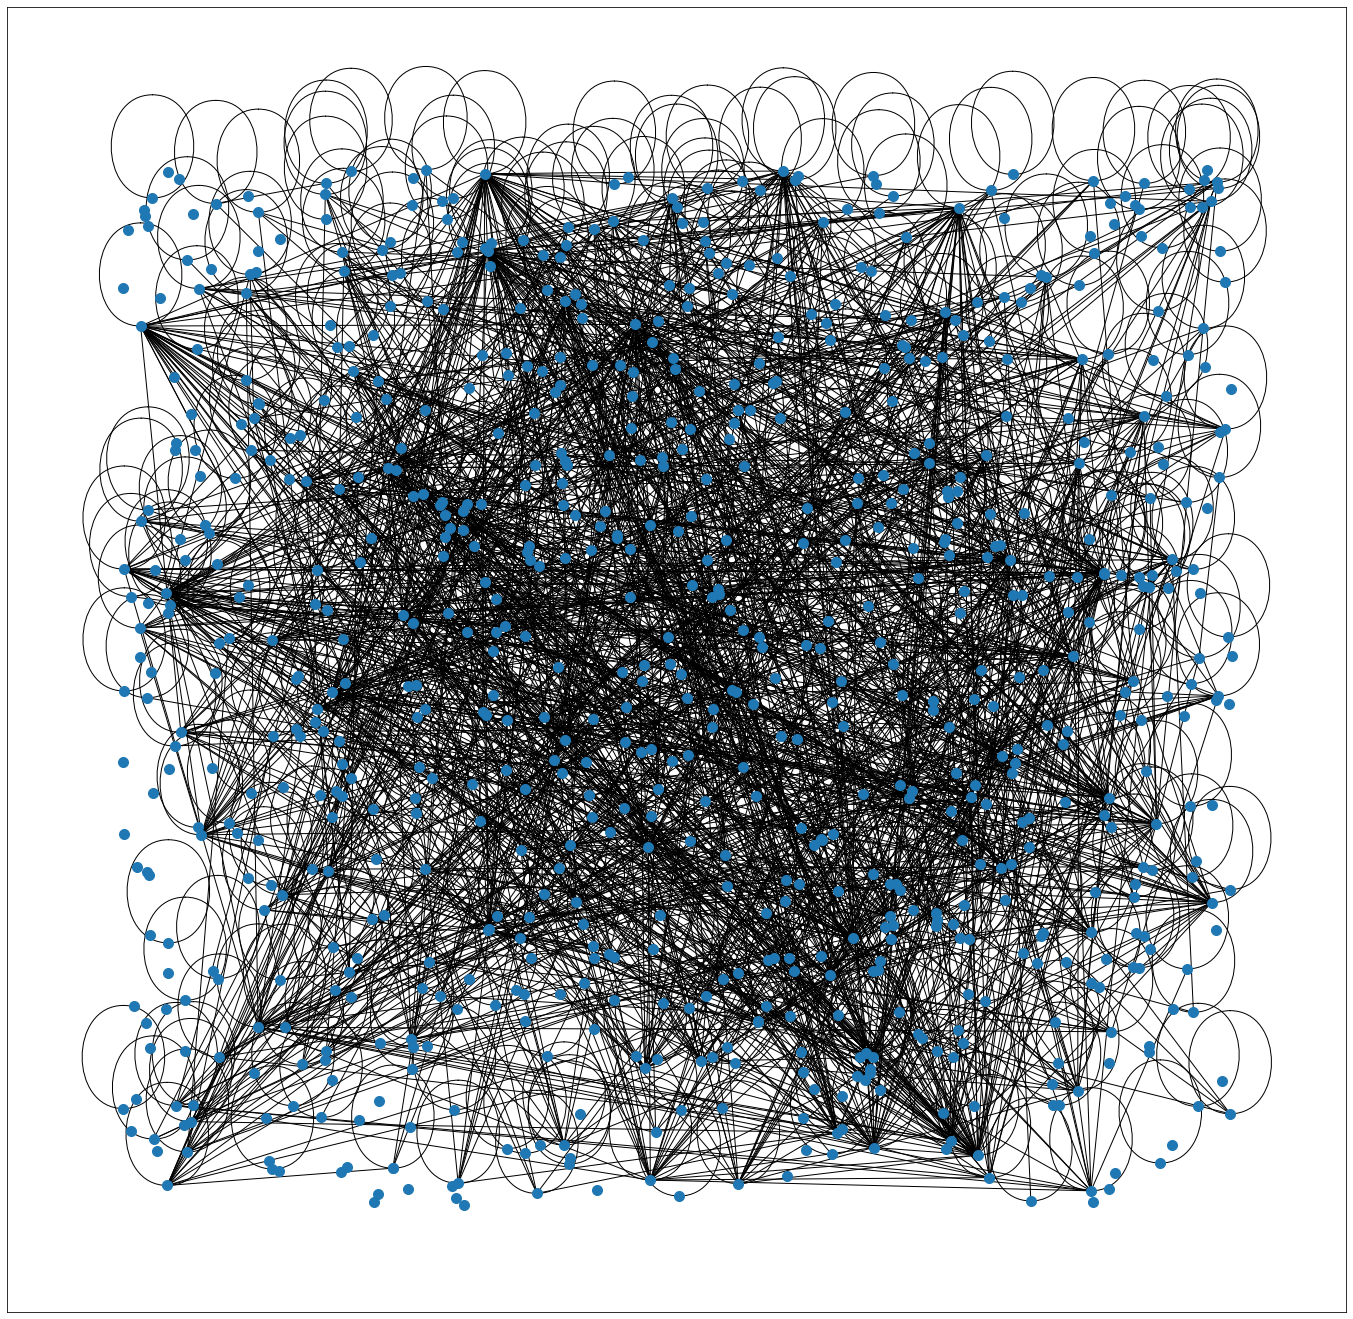

In [16]:
# EJERCICIO 3.1 

input = np.loadtxt(TEST_DIR + "ego-facebook.feat", dtype='i', delimiter=' ')
X = np.delete(input,0,1)

# Transformo matriz en archivo .txt
df = pandas.DataFrame(data=X.astype(float))
df.to_csv("ego-facebook.txt", sep=' ', header=False, float_format='%.2f', index=False)

# Matriz de similaridad
D = X @ X.T

# Calculo matriz de adyacencia y grafo de la red
n = D.shape[0]
x = np.random.rand(n)
y = np.random.rand(n)
W = np.vstack([x,y]).T
pos = {i:p for i,p in enumerate(zip(x,y))}
k = 5
f, axs = plt.subplots(figsize=(24,24))
min_non_0 = np.min(D[np.nonzero(D)])
ee = np.concatenate(([0], np.linspace(min_non_0, D.max() * 0.8, k)))
u = 7
# Construir matriz de adyacencia
A = D > u
# Construir grafo
G = nx.from_numpy_array(A)
# Plotear red
nx.draw_networkx_nodes(G,pos=pos, node_size=100)
nx.draw_networkx_edges(G,pos=pos)
axs[i].tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)

In [ ]:
# EJERCICIO 3.2 / 3.3

input = np.loadtxt(TEST_DIR + "ego-facebook.edges", dtype='i', delimiter=' ')
print(input)


In [ ]:
# EJERCICIO 3.4

# Matriz de covarianza
M_x = (X.T @ X)/(X.shape[0] - 1)
# print(M_x.shape[0])

# Guardo matriz de covarianza en archivo .txt 
df = pandas.DataFrame(data=M_x.astype(float))
df.to_csv(TEST_DIR + "covariance-matrix-fb.txt", sep = ' ', header=False, float_format='%.6f', index=False)

# Obtengo autovalores y autovectores de la matriz de covarianza
# run_test("covariance-matrix-fb.txt", 1000, 0.0001)

# Calculamos autovalores de la matriz de facebook 
eigenvals = np.loadtxt(TEST_DIR + "covariance-matrix-fb.txt_autovalores.out", dtype='f', delimiter=' ')

# Calculamos V (autovectores de M_x)
V = np.loadtxt(TEST_DIR + "covariance-matrix-fb.txt_autovectores.out", delimiter=' ', usecols=range(319))

# Calculamos D
D = np.diag(eigenvals)
print(D)
print(M_x)
res = V @ D @ V.T

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(10).fit(M_x)
plt.plot(np.cumsum(pca.explained_variance_ratio_));

In [ ]:
Z = pca.transform(X)

In [ ]:
f, axs = plt.subplots(1,1)
for i, ax in enumerate(axs.flatten()):
  ## 
  ax.imshow(np.sum((np.outer(Z[i], np.array([1]*2576)) * pca.components_ ), axis=0).reshape(h,w), cmap=plt.cm.gray);
  ax.axis('off')
plt.tight_layout()
pca.components_.shape